In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df_train = pd.read_csv('train.csv', na_values=['?'])
df_test = pd.read_csv('test.csv', na_values=['?'])
df_sample = pd.read_csv('sample_submission.csv')
df_train

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
1,CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
3,CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,CusID_01855,28.0,Not_Specified,Kolkata,New South Wales,6.0,2017-11-18,2020-07-24,0,1.074235,3.328216,9.075440,5.929733,2.081818,4.225626,Old_UI
15146,CusID_08497,25.0,Male,Sydney,New South Wales,8.0,2017-09-26,2020-03-11,0,0.604496,6.349027,0.413908,4.159025,1.214793,8.482181,New_UI
15147,CusID_01667,32.0,Female,San Francisco,Singapore,7.0,2018-06-09,2021-04-05,1,3.812781,2.869684,6.213548,NaN,7.477459,2.861971,Old_UI
15148,CusID_09014,32.0,Female,Sydney,New Delhi,10.0,2016-01-23,2020-08-23,0,4.607484,1.370857,6.108666,7.324654,7.748538,5.009866,New_UI


In [3]:
df_train.info() , df_test.info() , df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              15150 non-null  object 
 1   Age                     14147 non-null  float64
 2   Gender                  15150 non-null  object 
 3   City                    14704 non-null  object 
 4   State                   15150 non-null  object 
 5   No_of_orders_placed     14377 non-null  float64
 6   Sign_up_date            14996 non-null  object 
 7   Last_order_placed_date  15150 non-null  object 
 8   is_premium_member       15150 non-null  int64  
 9   Women’s_Clothing        15150 non-null  float64
 10  Men’s_Clothing          15150 non-null  float64
 11  Kid’s_Clothing          14215 non-null  float64
 12  Home_&_Living           14302 non-null  float64
 13  Beauty                  15150 non-null  float64
 14  Electronics             15150 non-null

(None, None, None)

In [4]:
df_train.isna().sum()

CustomerID                   0
Age                       1003
Gender                       0
City                       446
State                        0
No_of_orders_placed        773
Sign_up_date               154
Last_order_placed_date       0
is_premium_member            0
Women’s_Clothing             0
Men’s_Clothing               0
Kid’s_Clothing             935
Home_&_Living              848
Beauty                       0
Electronics                  0
Preferred_Theme              0
dtype: int64

### Age

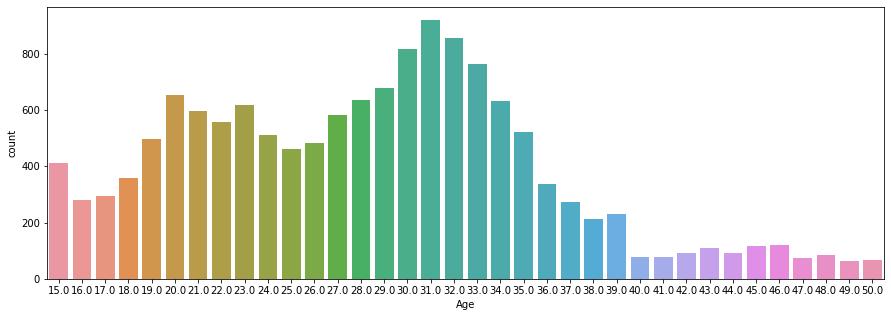

In [5]:
# Show value counts for a Age variable
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['Age']);

In [6]:
df_train['Age'].describe()

count    14147.000000
mean        28.356613
std          7.563249
min         15.000000
25%         22.000000
50%         29.000000
75%         33.000000
max         50.000000
Name: Age, dtype: float64

In [7]:
df_train['Age'].fillna(value=29, inplace=True)

### Gender

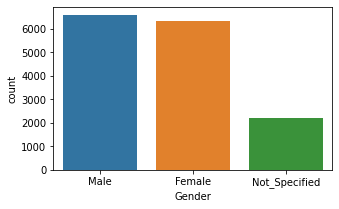

In [8]:
# Show value counts for a Gender
plt.figure(figsize=(5, 3))
sns.countplot(x=df_train['Gender']);

### City

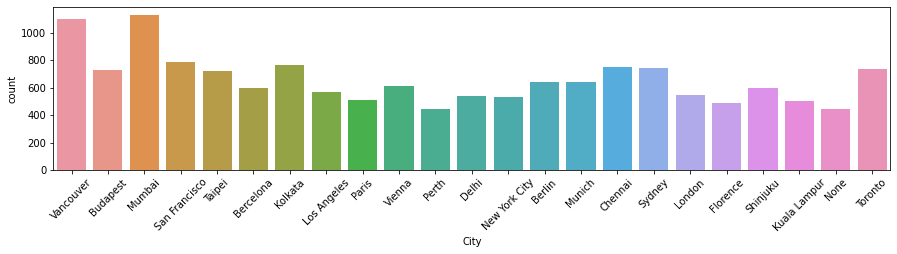

In [9]:
plt.figure(figsize=(15, 3))
df_train['City'].fillna(value='None', inplace=True)
sns.countplot(x=df_train['City'])
plt.xticks(rotation=45);

### State

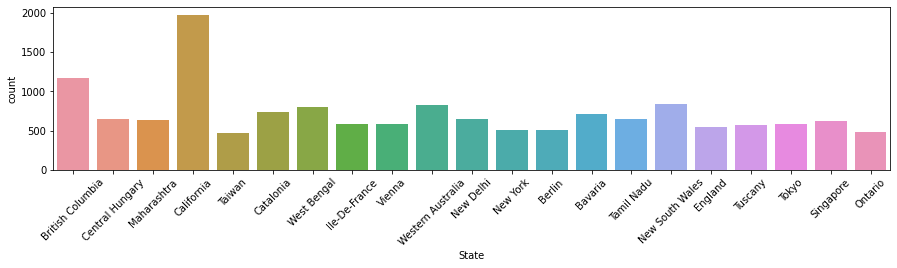

In [10]:
plt.figure(figsize=(15, 3))
sns.countplot(x=df_train['State'])
plt.xticks(rotation=45);

### No Of Orders Placed

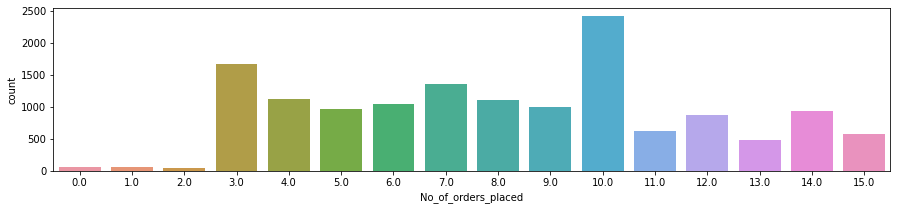

In [11]:
plt.figure(figsize=(15, 3))
sns.countplot(x=df_train['No_of_orders_placed']);

In [12]:
df_train['No_of_orders_placed'].unique()

array([ 4.,  9., nan,  7., 15., 14.,  5.,  8., 10.,  3.,  0., 13., 12.,
       11.,  6.,  1.,  2.])

> Note: In `No of orders placed` have null value that means that person not placed any order so we put all null value with `0.0`.

In [13]:
df_train['No_of_orders_placed'].fillna(value=0., inplace=True)

### Sign up date

In [14]:
df_train['Sign_up_date'] = pd.DatetimeIndex(df_train['Sign_up_date'])
df_train['Sign_up_Year'] = df_train['Sign_up_date'].dt.year
df_train['Sign_up_Year'].fillna(df_train['Sign_up_Year'].median(), inplace=True)
df_train['Sign_up_Month'] = df_train['Sign_up_date'].dt.month
df_train['Sign_up_Month'].fillna(df_train['Sign_up_Month'].median(), inplace=True)
df_train['Sign_up_Day'] = df_train['Sign_up_date'].dt.day
df_train['Sign_up_Day'].fillna(df_train['Sign_up_Day'].median(), inplace=True)
df_train.drop(columns=['Sign_up_date'], inplace=True)

In [15]:
df_train.isna().sum()

CustomerID                  0
Age                         0
Gender                      0
City                        0
State                       0
No_of_orders_placed         0
Last_order_placed_date      0
is_premium_member           0
Women’s_Clothing            0
Men’s_Clothing              0
Kid’s_Clothing            935
Home_&_Living             848
Beauty                      0
Electronics                 0
Preferred_Theme             0
Sign_up_Year                0
Sign_up_Month               0
Sign_up_Day                 0
dtype: int64

### Last order placed date

In [16]:
df_train['Last_order_placed_date'] = pd.DatetimeIndex(df_train['Last_order_placed_date'])
df_train['Last_order_placed_Year'] = df_train['Last_order_placed_date'].dt.year
df_train['Last_order_placed_Month'] = df_train['Last_order_placed_date'].dt.month
df_train['Last_order_placed_Day'] = df_train['Last_order_placed_date'].dt.day
df_train.drop(columns=['Last_order_placed_date'], inplace=True)

### Premium Member

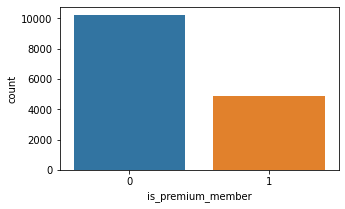

In [17]:
# Show value counts for a Gender
plt.figure(figsize=(5, 3))
sns.countplot(x=df_train['is_premium_member']);

### Women's Clothing

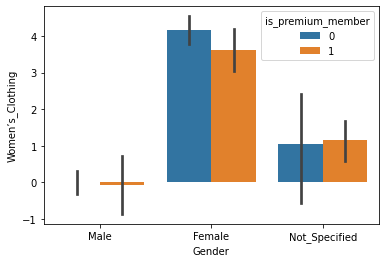

In [18]:
sns.barplot(x=df_train['Gender'], y=df_train['Women’s_Clothing'], hue=df_train['is_premium_member']);

### Men's Clothing

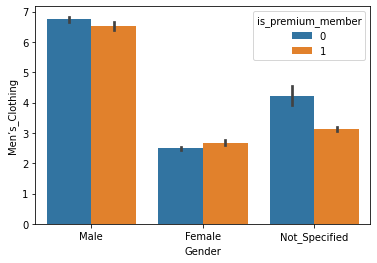

In [19]:
sns.barplot(x=df_train['Gender'], y=df_train['Men’s_Clothing'], hue=df_train['is_premium_member']);

### Kid's Clothing

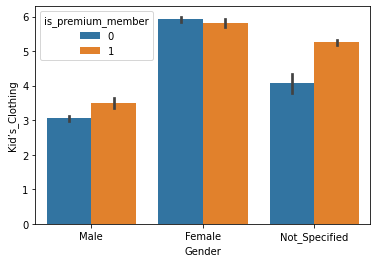

In [20]:
sns.barplot(x=df_train['Gender'], y=df_train['Kid’s_Clothing'], hue=df_train['is_premium_member']);

In [21]:
df_train['Kid’s_Clothing'].describe()

count    14215.000000
mean         4.573373
std          2.628990
min         -3.000000
25%          2.602179
50%          4.826021
75%          6.482865
max          9.997132
Name: Kid’s_Clothing, dtype: float64

In [22]:
df_train['Kid’s_Clothing'].median()

4.826021138935081

In [23]:
df_train['Kid’s_Clothing'].fillna(value=df_train['Kid’s_Clothing'].median(), inplace=True)

### Home & Living

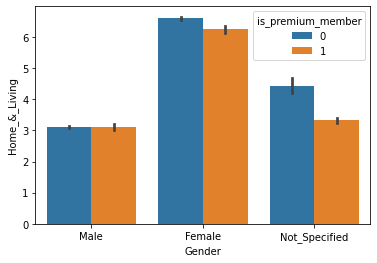

In [24]:
sns.barplot(x=df_train['Gender'], y=df_train['Home_&_Living'], hue=df_train['is_premium_member']);

In [25]:
df_train['Home_&_Living'].describe()

count    14302.000000
mean         4.576805
std          2.380538
min         -2.000000
25%          2.817589
50%          4.338659
75%          6.532475
max          9.993163
Name: Home_&_Living, dtype: float64

In [26]:
df_train['Home_&_Living'].median()

4.338659052684153

In [27]:
df_train['Home_&_Living'].fillna(value=df_train['Home_&_Living'].median(), inplace=True)

### Beauty

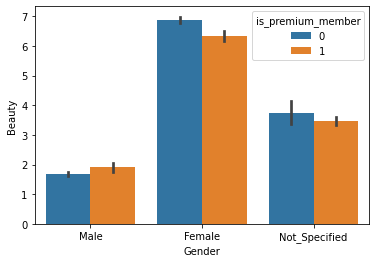

In [28]:
sns.barplot(x=df_train['Gender'], y=df_train['Beauty'], hue=df_train['is_premium_member']);

### Electronics

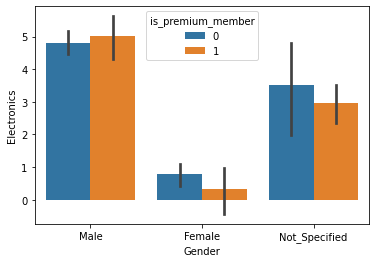

In [29]:
sns.barplot(x=df_train['Gender'], y=df_train['Electronics'], hue=df_train['is_premium_member']);

### Preferred Theme

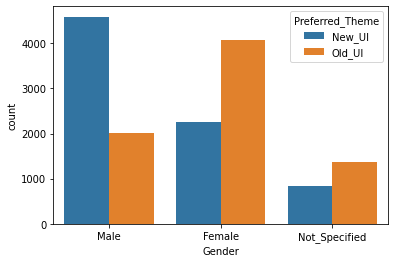

In [30]:
sns.countplot(x=df_train['Gender'], hue=df_train['Preferred_Theme']);

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               15150 non-null  object 
 1   Age                      15150 non-null  float64
 2   Gender                   15150 non-null  object 
 3   City                     15150 non-null  object 
 4   State                    15150 non-null  object 
 5   No_of_orders_placed      15150 non-null  float64
 6   is_premium_member        15150 non-null  int64  
 7   Women’s_Clothing         15150 non-null  float64
 8   Men’s_Clothing           15150 non-null  float64
 9   Kid’s_Clothing           15150 non-null  float64
 10  Home_&_Living            15150 non-null  float64
 11  Beauty                   15150 non-null  float64
 12  Electronics              15150 non-null  float64
 13  Preferred_Theme          15150 non-null  object 
 14  Sign_up_Year          

### Convert all data in numeric format

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               15150 non-null  object 
 1   Age                      15150 non-null  float64
 2   Gender                   15150 non-null  object 
 3   City                     15150 non-null  object 
 4   State                    15150 non-null  object 
 5   No_of_orders_placed      15150 non-null  float64
 6   is_premium_member        15150 non-null  int64  
 7   Women’s_Clothing         15150 non-null  float64
 8   Men’s_Clothing           15150 non-null  float64
 9   Kid’s_Clothing           15150 non-null  float64
 10  Home_&_Living            15150 non-null  float64
 11  Beauty                   15150 non-null  float64
 12  Electronics              15150 non-null  float64
 13  Preferred_Theme          15150 non-null  object 
 14  Sign_up_Year          

In [34]:
def convert_all_data_in_numeric(dataset):
    labeled_data = {}
    col_num = {}
    new_data = {}
    for colNo, column in enumerate(dataset.columns):
        if dataset[column].dtype == 'O':
            col_num[column] = colNo
            labeled_data[column] = LabelEncoder().fit(dataset[column])
        else:
            new_data[column] = list(dataset[column])
    new_data = pd.DataFrame(new_data)    
    for key, value in labeled_data.items():
        z = value.transform(dataset[key])
        new_data.insert(int(col_num[key]), key, z, True)
    return labeled_data, new_data            

In [35]:
labeled, df_temp = convert_all_data_in_numeric(df_train)

In [36]:
df_temp

,CustomerID,Age,Gender,City,State,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,Sign_up_Year,Sign_up_Month,Sign_up_Day,Last_order_placed_Year,Last_order_placed_Month,Last_order_placed_Day
0,102,22.0,1,21,2,4.0,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,0,2017.0,6.0,23.0,2021,4,1
1,743,29.0,0,2,5,9.0,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,1,2018.0,5.0,21.0,2020,1,26
2,1335,26.0,1,10,8,0.0,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,0,2019.0,2.0,15.0,2020,11,28
3,5083,29.0,1,16,3,7.0,0,2.116475,9.064060,5.387599,4.338659,0.459090,7.343461,0,2019.0,7.0,18.0,2020,11,16
4,3468,29.0,0,19,14,0.0,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,1,2018.0,2.0,5.0,2020,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,1508,28.0,2,6,10,6.0,0,1.074235,3.328216,9.075440,5.929733,2.081818,4.225626,1,2017.0,11.0,18.0,2020,7,24
15146,6931,25.0,1,18,10,8.0,0,0.604496,6.349027,0.413908,4.159025,1.214793,8.482181,0,2017.0,9.0,26.0,2020,3,11
15147,1353,32.0,0,16,13,7.0,1,3.812781,2.869684,6.213548,4.338659,7.477459,2.861971,1,2018.0,6.0,9.0,2021,4,5
15148,7354,32.0,0,18,9,10.0,0,4.607484,1.370857,6.108666,7.324654,7.748538,5.009866,0,2016.0,1.0,23.0,2020,8,23


<AxesSubplot:>

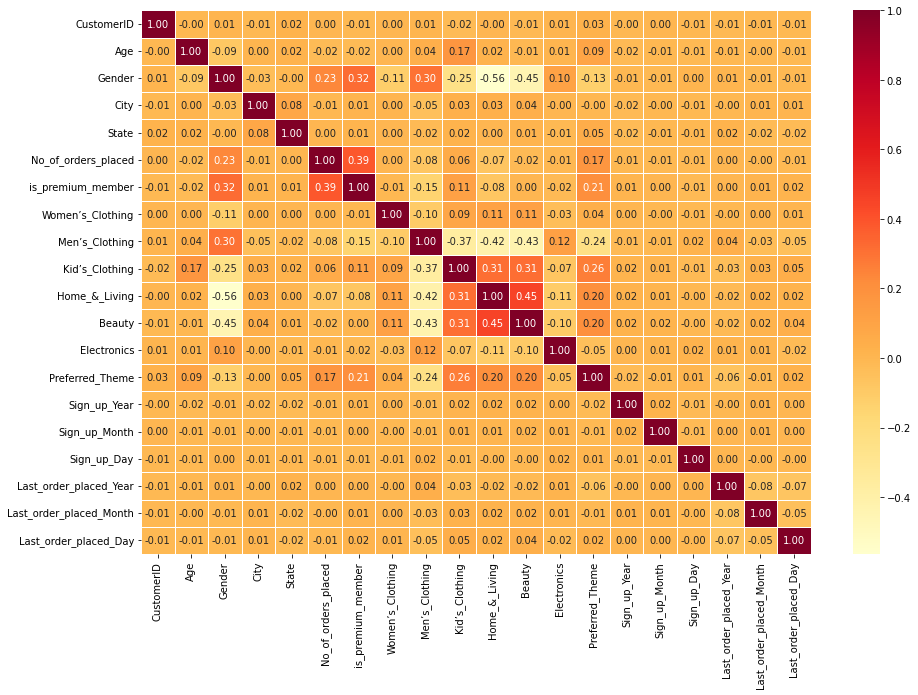

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_temp.corr(), annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5)

### Split data into features and target columns

In [37]:
from sklearn.model_selection import train_test_split

x = df_temp.drop(columns='Preferred_Theme')
y = df_temp['Preferred_Theme']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13635, 19), (1515, 19), (13635,), (1515,))

> Note: Target column(data) is categorical data that is why we use `LogicSticRegression`, `RandomForestClassifier`, `KNNclassifier`, `GradientBoostClassifier`, `XGBoostClassifier`.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\pkg_resources\__init__.py:116: PkgResourcesDeprecationWarning: a45ec3b71d3620b21cd8ae9c8cd0510ddb4a5c8f- is an invalid version and will not be supported in a future release
  warnings.warn(


In [39]:
def model_run(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    
    models_reg = {'LogisticRegression' : LogisticRegression(),
                  'RandomForestClassifier' : RandomForestClassifier(),
                  'GradientBoostingClassifier' : GradientBoostingClassifier(),
                  'KNeighborsClassifier' : KNeighborsClassifier(),
                  'XGBClassifier' : XGBClassifier()}
    score = {}
    
    for model_name, model in models_reg.items():
        # Fit the model
        model.fit(x_train, y_train)
        # Check score
        score[model_name] = model.score(x_test, y_test)
    
    return score

In [40]:
model_run()

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'LogisticRegression': 0.6726072607260726,
 'RandomForestClassifier': 0.6897689768976898,
 'GradientBoostingClassifier': 0.6871287128712872,
 'KNeighborsClassifier': 0.5498349834983498,
 'XGBClassifier': 0.6778877887788779}

### HyperParameters Tuning (by hand)

In [42]:
# KNN tune
train_score = []
test_score = []

# Create a list of different values for K-Neighbors
neighbors = range(1, 21)

# Setup KNN instant
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # update training score list
    train_score.append(knn.score(x_train, y_train))
    
    # update test score list
    test_score.append(knn.score(x_test, y_test))

In [43]:
train_score

[1.0,
 0.7608360836083609,
 0.7765309864319765,
 0.7148514851485148,
 0.7220388705537221,
 0.6832416574990833,
 0.6906490649064907,
 0.6683535020168684,
 0.6784745141180785,
 0.6563256325632564,
 0.6643931059772644,
 0.6478181151448478,
 0.651925192519252,
 0.6385038503850385,
 0.6454712137880455,
 0.635936927026036,
 0.6380638063806381,
 0.6316098276494316,
 0.6381371470480381,
 0.6247158049138247]

In [44]:
test_score

[0.532013201320132,
 0.5227722772277228,
 0.5405940594059406,
 0.5227722772277228,
 0.5498349834983498,
 0.5366336633663367,
 0.5524752475247525,
 0.5379537953795379,
 0.5511551155115512,
 0.5452145214521452,
 0.5491749174917492,
 0.5386138613861386,
 0.5458745874587458,
 0.5386138613861386,
 0.5458745874587458,
 0.5419141914191419,
 0.5458745874587458,
 0.5432343234323432,
 0.5537953795379538,
 0.5425742574257426]

Maximum KNN Score on the test data:55.38%


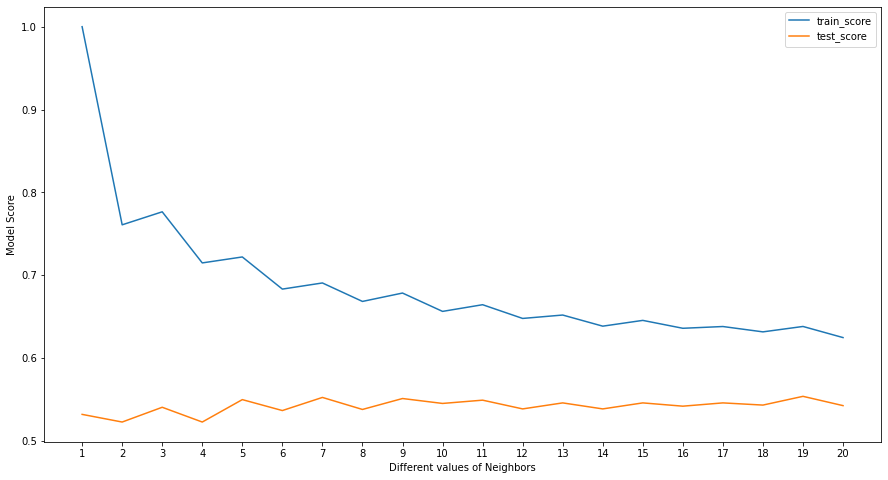

In [45]:
plt.figure(figsize=(15, 8))

sns.lineplot(x=neighbors, y=train_score)
sns.lineplot(x=neighbors, y=test_score)
plt.xticks(np.arange(1,21))
plt.xlabel('Different values of Neighbors')
plt.ylabel('Model Score')
plt.legend(['train_score', 'test_score'])

print(f'Maximum KNN Score on the test data:{max(test_score)*100:.2f}%')

### Hyperparameter tunning with RandomizedSearchCV
#### Now tunning following:

Logistic Regression()
Random Forest Classifier()
... using RandomizedSearchCV

In [46]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [49]:
# setup random hyperparameter search for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True, 
                                random_state=42)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [50]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [51]:
# Evaluate the randomized search randomforestClassifier model
rs_log_reg.score(x_test, y_test)

0.6739273927392739

### `RandomForestClassifier` Model run

In [69]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=hyperF,
                            cv=5,
                            n_iter=20,
                            verbose=True, 
                            random_state=42)
rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=42, verbose=True)

In [70]:
rs_rfc.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [71]:
rs_rfc.score(x_test, y_test)

0.700990099009901

In [72]:
# Create best params model for Random Forest Classifier
model_rfc = RandomForestClassifier(random_state = None,
                                   max_depth = 30,
                                   n_estimators = 800,
                                   min_samples_split = 5,
                                   min_samples_leaf = 1)
# Fit the model
model_rfc.fit(x_train, y_train)
# Check accuracy for this model
model_rfc.score(x_test, y_test)

0.7042904290429043

### Predict data


In [83]:
df_test.isna().sum()

CustomerID                 0
Age                       31
Gender                     0
City                      43
State                      0
No_of_orders_placed       72
Sign_up_date              22
Last_order_placed_date     0
is_premium_member          0
Women’s_Clothing           0
Men’s_Clothing             0
Kid’s_Clothing            23
Home_&_Living             23
Beauty                     0
Electronics                0
dtype: int64

In [84]:
# Fill null value
df_test['Age'].fillna(value=df_test['Age'].median(), inplace=True) # For Age
df_test['City'].fillna(value='None', inplace=True) # For City
df_test['No_of_orders_placed'].fillna(value=0., inplace=True) # For No_of_orders_placed
# For SignUpDate
df_test['Sign_up_date'] = pd.DatetimeIndex(df_test['Sign_up_date'])
df_test['Sign_up_Year'] = df_test['Sign_up_date'].dt.year
df_test['Sign_up_Year'].fillna(df_test['Sign_up_Year'].median(), inplace=True)
df_test['Sign_up_Month'] = df_test['Sign_up_date'].dt.month
df_test['Sign_up_Month'].fillna(df_test['Sign_up_Month'].median(), inplace=True)
df_test['Sign_up_Day'] = df_test['Sign_up_date'].dt.day
df_test['Sign_up_Day'].fillna(df_test['Sign_up_Day'].median(), inplace=True)
df_test.drop(columns=['Sign_up_date'], inplace=True)

df_test['Last_order_placed_date'] = pd.DatetimeIndex(df_test['Last_order_placed_date'])
df_test['Last_order_placed_Year'] = df_test['Last_order_placed_date'].dt.year
df_test['Last_order_placed_Month'] = df_test['Last_order_placed_date'].dt.month
df_test['Last_order_placed_Day'] = df_test['Last_order_placed_date'].dt.day
df_test.drop(columns=['Last_order_placed_date'], inplace=True)

df_test['Kid’s_Clothing'].fillna(value=df_test['Kid’s_Clothing'].median(), inplace=True) # For Kid’s_Clothing
df_test['Home_&_Living'].fillna(value=df_test['Home_&_Living'].median(), inplace=True)  # For Home_&_Living

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1850 non-null   object 
 1   Age                      1850 non-null   float64
 2   Gender                   1850 non-null   object 
 3   City                     1850 non-null   object 
 4   State                    1850 non-null   object 
 5   No_of_orders_placed      1850 non-null   float64
 6   is_premium_member        1850 non-null   int64  
 7   Women’s_Clothing         1850 non-null   float64
 8   Men’s_Clothing           1850 non-null   float64
 9   Kid’s_Clothing           1850 non-null   float64
 10  Home_&_Living            1850 non-null   float64
 11  Beauty                   1850 non-null   float64
 12  Electronics              1850 non-null   float64
 13  Sign_up_Year             1850 non-null   float64
 14  Sign_up_Month           

In [86]:
labeled_test, df_test_ = convert_all_data_in_numeric(df_test)

In [87]:
y_pred = model_rfc.predict(df_test_)

In [88]:
final_output = {'CustomerID': labeled_test['CustomerID'].inverse_transform(df_test_['CustomerID']),
                'Preferred_Theme' : labeled['Preferred_Theme'].inverse_transform(y_pred)}

final_output = pd.DataFrame(final_output)
final_output

,CustomerID,Preferred_Theme
0,CusID_09654,New_UI
1,CusID_09727,Old_UI
2,CusID_07391,Old_UI
3,CusID_08577,New_UI
4,CusID_08122,New_UI
...,...,...
1845,CusID_02254,New_UI
1846,CusID_00977,Old_UI
1847,CusID_00148,New_UI
1848,CusID_04876,Old_UI


In [89]:
final_output.to_csv('Submission.csv')